# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Adela Alejandra Solorio Alcázar

- ID: A01637205

- My carreer: ITC


# Importing libraries

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# PART 1
# Use your assigned dataset

## A1 Load data

In [113]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/a01637205/NotebooksProfessor/datasets/cartwheel/"

    # Define path del proyecto
    Ruta            = "/content/drive/MyDrive/Colab Notebooks/a01637205/NotebooksProfessor/datasets/"

else:
    # Define path del proyecto
    Ruta            = ""


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
# Dataset url
url = Ruta + "A01637205_X.csv"

# Load the dataset
df = pd.read_csv(url)

## A2 Data managment


Print the first 7 rows

In [115]:
df.head(7)

,Unnamed: 0,x1,x2,x3,x4,x5,x6
0,0,-6.108051,-6.710225,7.449982,11.493039,7.067782,-0.210217
1,1,-6.206677,-4.422185,0.354848,8.447279,6.103545,1.712683
2,2,-4.119060,-4.059562,2.284338,7.195207,1.723852,4.215468
3,3,3.489565,4.628838,7.818746,10.116034,-11.198842,3.223121
4,4,5.244161,3.443408,8.664659,6.367069,-12.351509,3.647803
5,5,5.841029,3.994921,9.112804,6.179918,-12.366545,7.905738
6,6,7.291603,5.370260,6.857271,10.527049,-6.234801,6.905511


Print the last 4 rows

In [116]:
df.iloc[-4:]

,Unnamed: 0,x1,x2,x3,x4,x5,x6
254,254,6.610330,1.273078,4.739605,8.479677,-11.038898,6.556038
255,255,-6.315800,-5.416517,2.278263,10.616842,4.843602,-0.069696
256,256,-8.690065,-5.983323,3.666243,6.443481,7.479635,1.479961
257,257,4.736128,3.230271,5.471063,10.882065,-12.281929,3.685385


How many rows and columns are in your data? Hay 258 filas y 7 columnas

Use the `shape` method


In [117]:
df.shape

(258, 7)

Print the name of all columns

Use the `columns` method

In [118]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6'], dtype='object')

What is the data type in each column

Use the `dtypes` method

In [119]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
x5            float64
x6            float64
dtype: object

What is the meaning of rows and columns?

In [120]:
# Your responses here
"""Las filas representan cada medición tomada, iniciando desde la toma 0 hasta la 257.
Las columnas representan distintas variables desconocidas con valores de tipo numéricos,
excepto por la primera (que también es númerica) que representa el número de toma."""


'Las filas representan cada medición tomada, iniciando desde la toma 0 hasta la 257.\nLas columnas representan distintas variables desconocidas con valores de tipo numéricos, \nexcepto por la primera (que también es númerica) que representa el número de toma.'

Print a statistical summary of your columns


In [121]:
df.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,x6
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,128.500000,0.064710,-1.770579,4.663143,8.955745,-1.484447,3.885241
std,74.622383,5.947367,4.651482,3.241858,1.917292,7.835742,2.467810
min,0.000000,-11.089086,-12.201649,-2.290597,4.610542,-14.691532,-3.683476
25%,64.250000,-5.425028,-5.943322,2.031942,7.669513,-8.952463,2.036746
50%,128.500000,0.694525,-2.055683,4.821210,9.194709,-2.224856,3.867952
75%,192.750000,5.779487,2.647229,7.306805,10.423035,6.188736,5.675709
max,257.000000,10.439700,7.101453,12.102099,13.453821,11.327603,9.459514


In [122]:
# 1) What is the minumum and maximum values of each variable
"""
x1:
  min: -11.089086
  max: 10.4397

x2:
  min: -12.201649
  max: 7.101453

x3:
  min: -2.290597
  max: 12.102099

x4:
  min: 4.610542
  max: 13.453821

x5:
  min: -14.691532
  max: 11.327603

x6:
  min: -3.683476
  max: 9.459514


# 2) What is the mean and standar deviation of each variable
x1:
  mean: 0.064710
  std: 5.947367

x2:
  mean: -1.770579
  std: 4.651482

x3:
  mean: 4.663143
  std: 3.241858

x4:
  mean: 8.955745
  std: 1.917292

x5:
  mean: -1.484447
  std: 7.835742

x6:
  mean: 3.885241
  std: 2.467810


# 3) What the 25%, 50% and 75% represent?
x1:
  25%: -5.425028
  50%: 0.694525
  75%: 5.779487

x2:
  25%: -5.943322
  50%: -2.055683
  75%: 2.647229

x3:
  25%: 2.031942
  50%: 4.821210
  75%: 7.306805

x4:
  25%: 7.669513
  50%: 9.194709
  75%: 10.423035

x5:
  25%: -8.952463
  50%: -2.224856
  75%: 6.188736

x6:
  25%: 2.036746
  50%: 3.867952
  75%: 5.675709


"""



'\nx1:\n  min: -11.089086\n  max: 10.4397\n\nx2:\n  min: -12.201649\n  max: 7.101453\n\nx3:\n  min: -2.290597\n  max: 12.102099\n\nx4:\n  min: 4.610542\n  max: 13.453821\n\nx5:\n  min: -14.691532\n  max: 11.327603\n\nx6:\n  min: -3.683476\n  max: 9.459514\n\n\n# 2) What is the mean and standar deviation of each variable\nx1:\n  mean: 0.064710\n  std: 5.947367\n\nx2:\n  mean: -1.770579\n  std: 4.651482\n\nx3:\n  mean: 4.663143\n  std: 3.241858\n\nx4:\n  mean: 8.955745\n  std: 1.917292\n\nx5:\n  mean: -1.484447\n  std: 7.835742\n\nx6:\n  mean: 3.885241\n  std: 2.467810\n\n\n# 3) What the 25%, 50% and 75% represent?\nx1:\n  25%: -5.425028\n  50%: 0.694525\n  75%: 5.779487\n\nx2:\n  25%: -5.943322\n  50%: -2.055683\n  75%: 2.647229\n\nx3:\n  25%: 2.031942\n  50%: 4.821210\n  75%: 7.306805\n\nx4:\n  25%: 7.669513\n  50%: 9.194709\n  75%: 10.423035\n\nx5:\n  25%: -8.952463\n  50%: -2.224856\n  75%: 6.188736\n\nx6:\n  25%: 2.036746\n  50%: 3.867952\n  75%: 5.675709\n\n\n'

Rename the columns using the same name with capital letters

In [123]:
df.rename(columns={"x1": "X1", "x2": "X2", "x3": "X3", "x4": "X4", "x5": "X5", "x6": "X6"})

,Unnamed: 0,X1,X2,X3,X4,X5,X6
0,0,-6.108051,-6.710225,7.449982,11.493039,7.067782,-0.210217
1,1,-6.206677,-4.422185,0.354848,8.447279,6.103545,1.712683
2,2,-4.119060,-4.059562,2.284338,7.195207,1.723852,4.215468
3,3,3.489565,4.628838,7.818746,10.116034,-11.198842,3.223121
4,4,5.244161,3.443408,8.664659,6.367069,-12.351509,3.647803
...,...,...,...,...,...,...,...
253,253,-1.660286,-5.035091,1.992441,7.622380,5.400063,3.097290
254,254,6.610330,1.273078,4.739605,8.479677,-11.038898,6.556038
255,255,-6.315800,-5.416517,2.278263,10.616842,4.843602,-0.069696
256,256,-8.690065,-5.983323,3.666243,6.443481,7.479635,1.479961


Rename the columns to their original names

In [124]:
df.rename(columns={"X1": "x1", "X2": "x2", "X3": "x3", "X4": "x4", "X5": "x5", "X6": "x6"})

,Unnamed: 0,x1,x2,x3,x4,x5,x6
0,0,-6.108051,-6.710225,7.449982,11.493039,7.067782,-0.210217
1,1,-6.206677,-4.422185,0.354848,8.447279,6.103545,1.712683
2,2,-4.119060,-4.059562,2.284338,7.195207,1.723852,4.215468
3,3,3.489565,4.628838,7.818746,10.116034,-11.198842,3.223121
4,4,5.244161,3.443408,8.664659,6.367069,-12.351509,3.647803
...,...,...,...,...,...,...,...
253,253,-1.660286,-5.035091,1.992441,7.622380,5.400063,3.097290
254,254,6.610330,1.273078,4.739605,8.479677,-11.038898,6.556038
255,255,-6.315800,-5.416517,2.278263,10.616842,4.843602,-0.069696
256,256,-8.690065,-5.983323,3.666243,6.443481,7.479635,1.479961


Use two different alternatives to get one of the columns

In [125]:
df.x1

0     -6.108051
1     -6.206677
2     -4.119060
3      3.489565
4      5.244161
         ...   
253   -1.660286
254    6.610330
255   -6.315800
256   -8.690065
257    4.736128
Name: x1, Length: 258, dtype: float64

In [126]:
df["x1"]

0     -6.108051
1     -6.206677
2     -4.119060
3      3.489565
4      5.244161
         ...   
253   -1.660286
254    6.610330
255   -6.315800
256   -8.690065
257    4.736128
Name: x1, Length: 258, dtype: float64

Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [127]:
df.iloc[62:73, 1:3]

,x1,x2
62,3.943674,2.654611
63,-4.702927,-12.201649
64,-3.921355,-9.569654
65,-6.327562,-9.988142
66,-3.469076,-4.771871
67,6.381437,2.720978
68,1.555598,3.002049
69,0.415042,-7.419107
70,3.814969,1.950133
71,6.080688,4.129953


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [128]:
#second column
x1nulo = df.x1.isnull().sum()
x1noNulo = df.x1.notnull().sum()

x1total = x1nulo + x1noNulo

print ("Segunda columna: ")
print(x1nulo, "valores nulos")
print(x1noNulo, "valores no nulos")
print(x1total, "valores en total")

#third column
x2nulo = df.x2.isnull().sum()
x2noNulo = df.x2.notnull().sum()

x2total = x2nulo + x2noNulo

print()
print ("Tercera columna: ")
print(x2nulo, "valores nulos")
print(x2noNulo, "valores no nulos")
print(x2total, "valores en total")

Segunda columna: 
0 valores nulos
258 valores no nulos
258 valores en total

Tercera columna: 
0 valores nulos
258 valores no nulos
258 valores en total


Discard the last column


In [129]:
df.drop("x6", axis=1, inplace=True)
df

,Unnamed: 0,x1,x2,x3,x4,x5
0,0,-6.108051,-6.710225,7.449982,11.493039,7.067782
1,1,-6.206677,-4.422185,0.354848,8.447279,6.103545
2,2,-4.119060,-4.059562,2.284338,7.195207,1.723852
3,3,3.489565,4.628838,7.818746,10.116034,-11.198842
4,4,5.244161,3.443408,8.664659,6.367069,-12.351509
...,...,...,...,...,...,...
253,253,-1.660286,-5.035091,1.992441,7.622380,5.400063
254,254,6.610330,1.273078,4.739605,8.479677,-11.038898
255,255,-6.315800,-5.416517,2.278263,10.616842,4.843602
256,256,-8.690065,-5.983323,3.666243,6.443481,7.479635


### Questions

Based on the previos results, provide a description of yout dataset

Your response:
El dataset tiene 258 mediciones con 6 variables, todas las mediciones son de tipo numérico y sus valores son mayormente pequeños o negativos. Tiene una columna inicial con el número de medición que no tiene nombre.




In [130]:
#Reload dataset
df = pd.read_csv(url)

## A3 Data visualization

Plot in the same figure the histogram of two variables



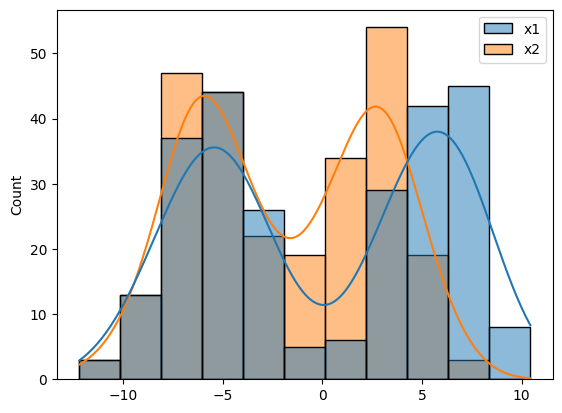

In [131]:
df2plot = df [["x1", "x2"]]
sns.histplot(df2plot, kde = True)
plt.show()

Based on these plots, provide a description of your data:

Your response here:
Los datos en estas dos columnas tienen valores muy similares, aunque los de x1 llegan a ser mayores.

Plot in the same figure the boxplot of two variables

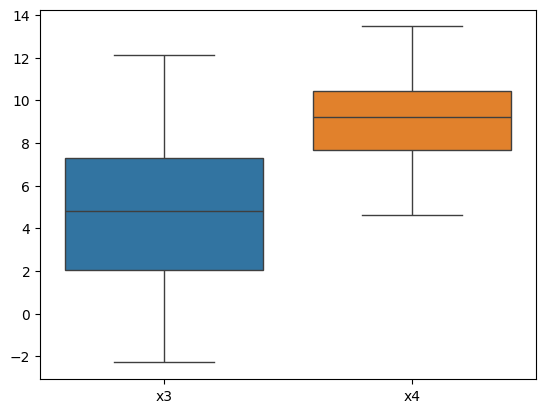

In [132]:
df2plot = df [["x3", "x4"]]
sns.boxplot(data = df2plot)
plt.show()

Plot the scatter plot of two variables

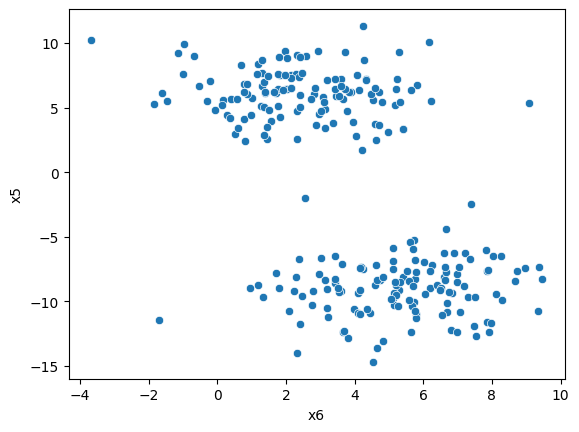

In [133]:
sns.scatterplot(data=df, y="x5", x="x6")
plt.show()

### Questions

Based on the previos plots, provide a description of yout dataset

Your response:
Se puede notar que en x5 y x6 existen 2 grupos muy marcados, que los valores de x4 son mayormente mayores que los de x3, y que los valores de x3 tienen un rango más grande.



## A4 Kmeans

In [134]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [135]:
df

,x1,x2,x3,x4,x5,x6
0,-6.108051,-6.710225,7.449982,11.493039,7.067782,-0.210217
1,-6.206677,-4.422185,0.354848,8.447279,6.103545,1.712683
2,-4.119060,-4.059562,2.284338,7.195207,1.723852,4.215468
3,3.489565,4.628838,7.818746,10.116034,-11.198842,3.223121
4,5.244161,3.443408,8.664659,6.367069,-12.351509,3.647803
...,...,...,...,...,...,...
253,-1.660286,-5.035091,1.992441,7.622380,5.400063,3.097290
254,6.610330,1.273078,4.739605,8.479677,-11.038898,6.556038
255,-6.315800,-5.416517,2.278263,10.616842,4.843602,-0.069696
256,-8.690065,-5.983323,3.666243,6.443481,7.479635,1.479961


Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [136]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  = 2 # Let's assume there are 2,3,4,5...? clusters/groups

# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
yestimated = km.fit_predict(df.select_dtypes(include="number"))

# Print estimated cluster of each point in the dataset
yestimated

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

Add to your dataset a column with the estimated cluster to each data point

In [137]:
df['yestimated'] = yestimated

df

,x1,x2,x3,x4,x5,x6,yestimated
0,-6.108051,-6.710225,7.449982,11.493039,7.067782,-0.210217,0
1,-6.206677,-4.422185,0.354848,8.447279,6.103545,1.712683,0
2,-4.119060,-4.059562,2.284338,7.195207,1.723852,4.215468,0
3,3.489565,4.628838,7.818746,10.116034,-11.198842,3.223121,1
4,5.244161,3.443408,8.664659,6.367069,-12.351509,3.647803,1
...,...,...,...,...,...,...,...
253,-1.660286,-5.035091,1.992441,7.622380,5.400063,3.097290,0
254,6.610330,1.273078,4.739605,8.479677,-11.038898,6.556038,1
255,-6.315800,-5.416517,2.278263,10.616842,4.843602,-0.069696,0
256,-8.690065,-5.983323,3.666243,6.443481,7.479635,1.479961,0


Print the number associated to each cluster

In [138]:
df.yestimated.unique()

array([0, 1], dtype=int32)

Print the centroids

In [139]:
km.cluster_centers_

array([[-5.49262402, -5.96483008,  2.00902767,  8.73520327,  6.06770761,
         2.42031194],
       [ 5.62204333,  2.42367169,  7.31725831,  9.17628592, -9.03660087,
         5.35016908]])

Print the intertia metric

In [140]:
km.inertia_

6035.8623477806295

Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

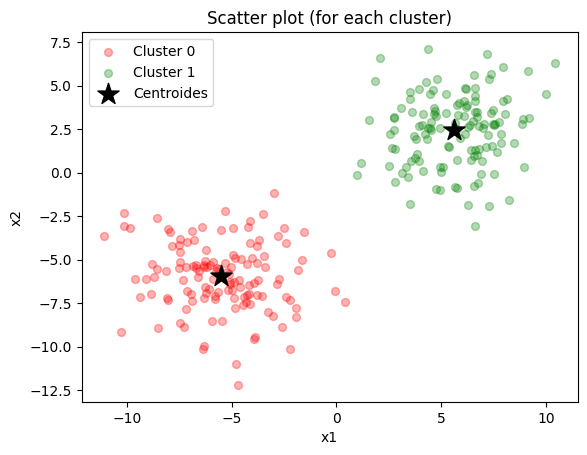

In [141]:
# Get a dataframe with the data of each cluster
df1 = df[df.yestimated==0]
df2 = df[df.yestimated==1]

# Scatter plot of each cluster
plt.scatter(df1.x1, df1.x2, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.x1, df2.x2, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Questions

Provides a detailed description of your results

Your response: El dataset tiene 2 clusters o grupos evidentes, por lo que se puede asumir que los datos pertenecen a dos grupos.

## A5 Elbow plot

Compute the Elbow plot

In [142]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df.select_dtypes(include="number"))
    # Save sse for each k
    sse.append(km.inertia_)

In [143]:
sse

[35705.78856889656,
 6035.8623477806295,
 5638.979854078797,
 5166.921418296994,
 4899.990925450925,
 4833.597289524174,
 4304.555317448916,
 4147.336507240452,
 3982.6085768167086]

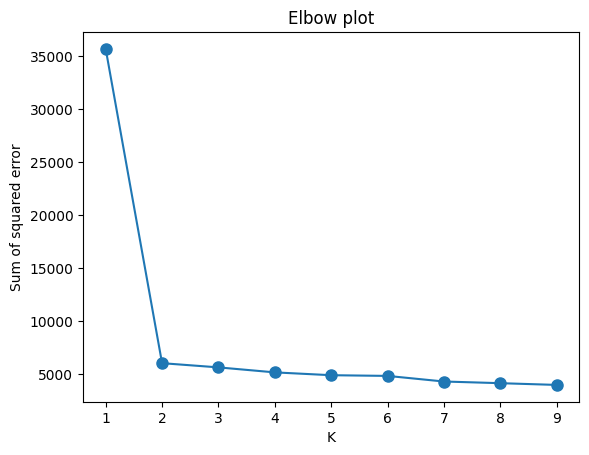

In [144]:
# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response: 2 porque a partir de ahí el valor de sse s reduce minimamente.


Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response: Sí porque desde el primer scatterplot creado en la parte de arriba se notaban los dos grupos, entonces desde el principio asumí que k=2.



# PART 2
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables




```
# Esto tiene formato de código
```

Escribe tu descripción del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta: Considero que si dearrollé esta competencia porque ahora soy capaz de, a partir de un dataset, interpretar sus variables, la interacción entre ellas, y crear un modelo que represente ello para producir las respuestas necesarias.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta: Creo que logré desarrollar esta competencia porque ya fui capaz de construir un modelo de este tipo y considero que lo podría reproduir.